In [1]:
# Install if needed (Colab usually has these pre-installed)
!pip install pandas seaborn matplotlib scikit-learn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
from google.colab import files
uploaded = files.upload()

# Replace with your filename
df = pd.read_csv("adult.csv")
df.head()

Saving adult.csv to adult.csv


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'education' (ordered categories)
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])

# One-Hot Encoding for unordered categorical features
df = pd.get_dummies(df, columns=[
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'gender',          # <-- use 'gender' instead of 'sex'
    'native-country'
])

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = [
    'age',
    'fnlwgt',
    'educational-num',   # <-- use 'educational-num'
    'capital-gain',
    'capital-loss',
    'hours-per-week'
]

df[num_features] = scaler.fit_transform(df[num_features])

In [8]:
print(df.columns.tolist())

['age', 'fnlwgt', 'education', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income', 'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_?', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'relationship_Husband', 'relations

In [9]:
print(df.shape)
df.head()

(48842, 94)


,age,fnlwgt,education,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.995129,0.351675,1,-1.197259,-0.144804,-0.217127,-0.034087,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,-0.046942,-0.945524,11,-0.419335,-0.144804,-0.217127,0.772930,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-0.776316,1.394723,7,0.747550,-0.144804,-0.217127,-0.034087,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.390683,-0.277844,15,-0.030373,0.886874,-0.217127,-0.034087,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,-1.505691,-0.815954,15,-0.030373,-0.144804,-0.217127,-0.841104,<=50K,True,False,...,False,False,False,False,False,False,False,True,False,False


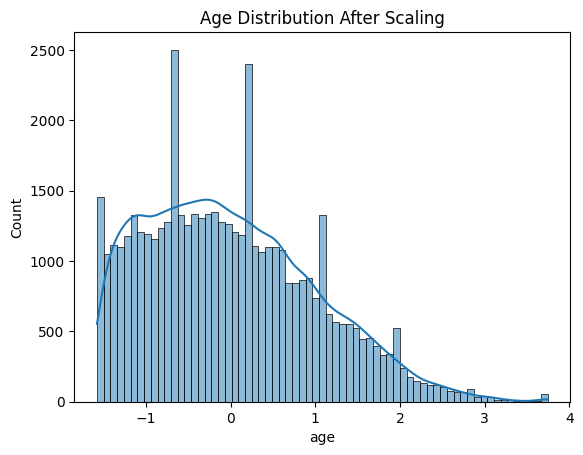

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Age before scaling
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution After Scaling")
plt.show()

In [12]:
from google.colab import files

df.to_csv("adult_preprocessed.csv", index=False)
files.download("adult_preprocessed.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>